# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [21]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 589


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | iqaluit
Processing Record 2 of Set 1 | selfoss
Processing Record 3 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | floro
Processing Record 6 of Set 1 | isafjordur
Processing Record 7 of Set 1 | porto novo
Processing Record 8 of Set 1 | laojunmiao
Processing Record 9 of Set 1 | weno
Processing Record 10 of Set 1 | hawaiian paradise park
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | tolanaro
Processing Record 13 of Set 1 | waitangi
Processing Record 14 of Set 1 | batticaloa
Processing Record 15 of Set 1 | kokpekty
Processing Record 16 of Set 1 | bodo
Processing Record 17 of Set 1 | acarau
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | talnakh
Processing Record 20 of Set 1 | villa garcia
Processing Record 21 of Set 1 | edinburgh of the seven seas
Processing Record 22 o

In [11]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [12]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,iqaluit,63.7506,-68.5145,279.00,60,75,6.71,CA,1687991297
1,selfoss,63.9331,-20.9971,281.51,87,95,11.00,IS,1687991297
2,grytviken,-54.2811,-36.5092,267.06,75,17,4.04,GS,1687991107
3,floro,61.5996,5.0328,290.50,88,75,3.60,NO,1687991298
4,isafjordur,66.0755,-23.1240,278.75,89,100,3.89,IS,1687991298


In [13]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [14]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,279.00,60,75,6.71,CA,1687991297
1,selfoss,63.9331,-20.9971,281.51,87,95,11.00,IS,1687991297
2,grytviken,-54.2811,-36.5092,267.06,75,17,4.04,GS,1687991107
3,floro,61.5996,5.0328,290.50,88,75,3.60,NO,1687991298
4,isafjordur,66.0755,-23.1240,278.75,89,100,3.89,IS,1687991298


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

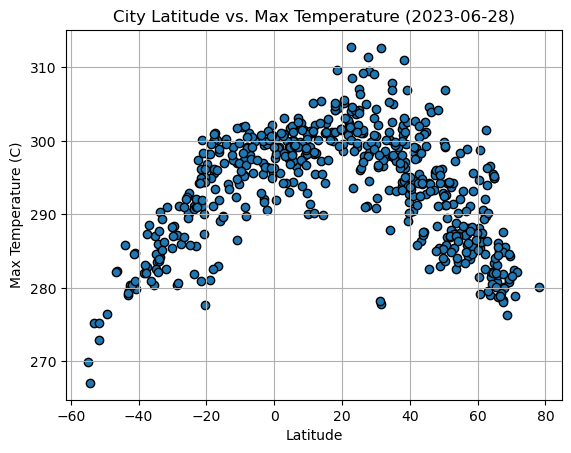

In [24]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black")

# Get the current date
current_date = datetime.date.today()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

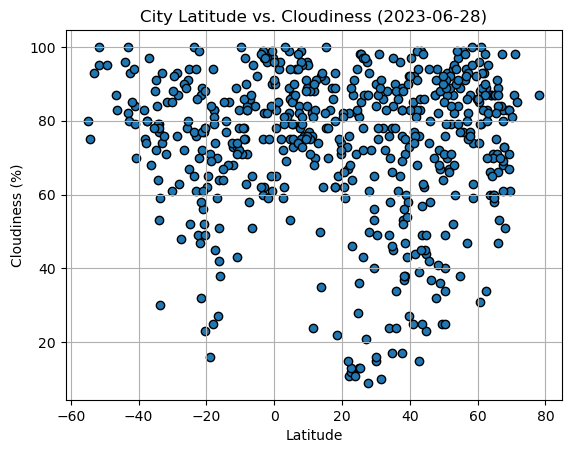

In [25]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black")

# Get the current date
current_date = datetime.date.today()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

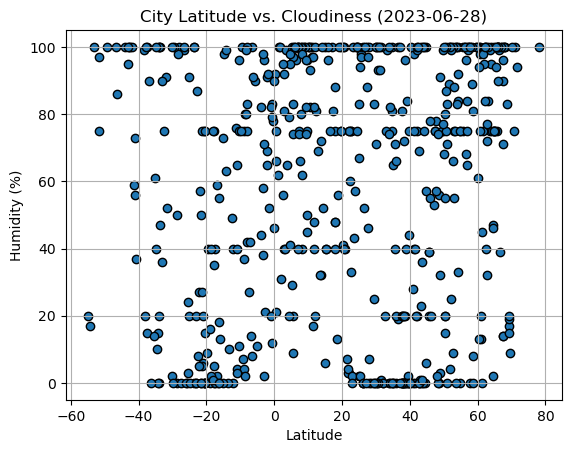

In [26]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black")

# Get the current date
current_date = datetime.date.today()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

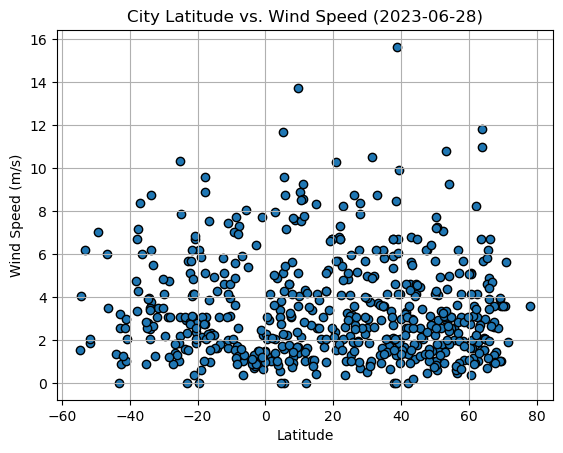

In [27]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black")

# Get the current date
current_date = datetime.date.today()

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({current_date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [125]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_values, y_values, x_label, y_label, save_file):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line values
    regression_values = x_values * slope + intercept

    # Plot the scatter plot
    plt.scatter(x_values, y_values, marker='o', edgecolors='black', alpha=0.75)

    # Plot the regression line
    plt.plot(x_values, regression_values, color='red')

    # Add labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Print the R-value
    print(f"The r-value is: {rvalue}")
    
    # Add the line equation
    r_value_text = f"The r-value: {rvalue}"
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
    plt.text(0.98, 0.02, line_eq, fontsize=12, color='red', ha='right', va='bottom', transform=plt.gca().transAxes)
    plt.text(0.02, 0.98, r_value_text, fontsize=12, color='black', ha='left', va='top', transform=plt.gca().transAxes)
    
    # Save file
    plt.savefig(save_file)
    
    # Show the plot
    plt.show()    

In [123]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,iqaluit,63.7506,-68.5145,279.00,60,75,6.71,CA,1687991297
1,selfoss,63.9331,-20.9971,281.51,87,95,11.00,IS,1687991297
3,floro,61.5996,5.0328,290.50,88,75,3.60,NO,1687991298
4,isafjordur,66.0755,-23.1240,278.75,89,100,3.89,IS,1687991298
5,porto novo,6.4965,2.6036,296.57,94,96,2.24,BJ,1687991235


In [64]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,grytviken,-54.2811,-36.5092,267.06,75,17,4.04,GS,1687991107
9,adamstown,-25.0660,-130.1015,292.97,67,91,10.33,PN,1687991108
10,tolanaro,-25.0319,46.9987,290.19,94,20,3.09,MG,1687991122
11,waitangi,-43.9535,-176.5597,285.83,96,100,1.34,NZ,1687991110
15,acarau,-2.8856,-40.1200,299.50,82,2,6.44,BR,1687991301


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.6763907753104038


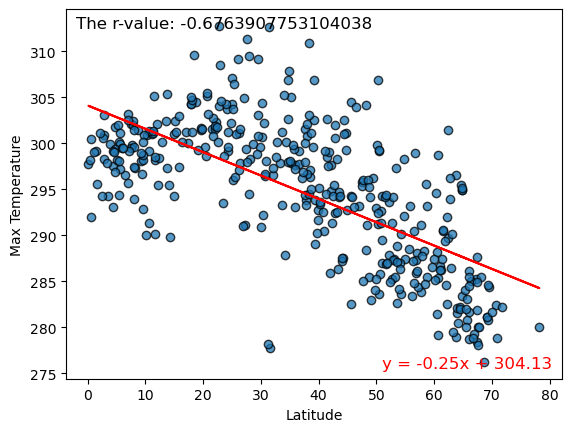

In [126]:
# Linear regression on Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Max Temp"]
x_label_northern = "Latitude"
y_label_northern = "Max Temperature"
save_file_northern = "output_data/Fig5.png"

create_linear_regression_plot(x_values_northern, y_values_northern, x_label_northern, y_label_northern, save_file_northern)

The r-value is: 0.8254539113403101


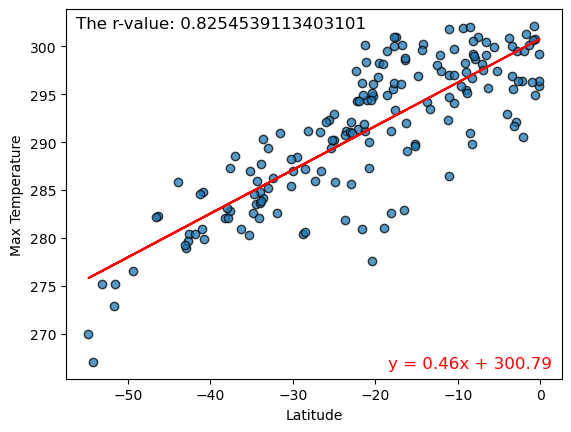

In [128]:
# Linear regression on Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Max Temp"]
x_label_southern = "Latitude"
y_label_southern = "Max Temperature"
save_file_southern = "output_data/Fig6.png"

create_linear_regression_plot(x_values_southern, y_values_southern, x_label_southern, y_label_southern, save_file_southern)

**Discussion about the linear relationship:** 
1. For the northern hemisphere:
The r-value is -0.68, indicating a moderate negative correlation between the variables. This means that as the latitude increases, the maximum temperature decreases, but the relationship is not extremely strong. The negative slope suggests that as the latitude increases, the maximum temperature tends to decrease.
2. For the southern hemisphere:
The r-value is 0.83, indicating a strong positive correlation between the variables. This means that as the latitude increases, the maximum temperature also tends to increase, and the relationship is quite strong. The positive slope suggests that as the latitude increases, the maximum temperature tends to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0008813874152365281


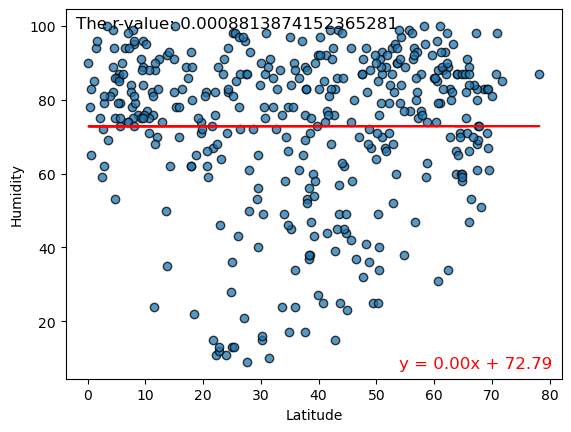

In [129]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Humidity"]
x_label_northern = "Latitude"
y_label_northern = "Humidity"
save_file_northern = "output_data/Fig7.png"

create_linear_regression_plot(x_values_northern, y_values_northern, x_label_northern, y_label_northern, save_file_northern)

The r-value is: -0.07771575445766292


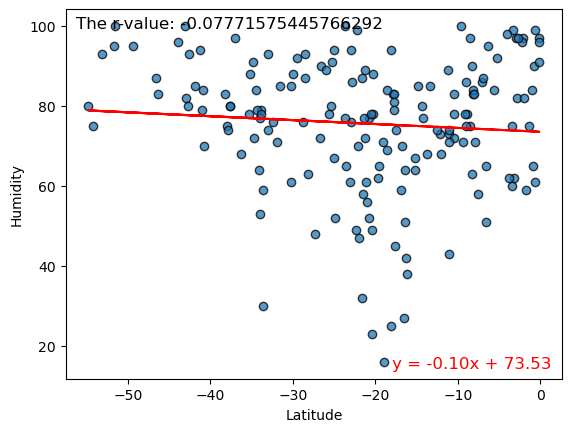

In [130]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Humidity"]
x_label_southern = "Latitude"
y_label_southern = "Humidity"
save_file_southern = "output_data/Fig8.png"

create_linear_regression_plot(x_values_southern, y_values_southern, x_label_southern, y_label_southern, save_file_southern)

**Discussion about the linear relationship:** 
1. For the northern hemisphere:
The r-value is very close to 0 (0.001), indicating a very weak or no correlation between latitude and humidity in the northern hemisphere. The data points are widely scattered and do not follow a clear linear trend. The slope is close to zero, indicating no change in humidity as latitude increases.
2. For the southern hemisphere:
The r-value is -0.08, indicating a very weak negative correlation between latitude and humidity in the southern hemisphere. The relationship is very weak, and the data points do not follow a clear linear trend. The slope is very close to zero, indicating almost no change in humidity with latitude.

Overall, both the northern and southern hemispheres show a very weak or no significant linear relationship between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.0018970360966118498


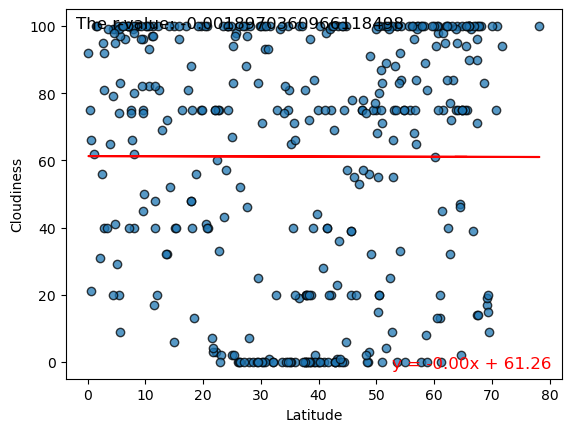

In [131]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Cloudiness"]
x_label_northern = "Latitude"
y_label_northern = "Cloudiness"
save_file_northern = "output_data/Fig9.png"

create_linear_regression_plot(x_values_northern, y_values_northern, x_label_northern, y_label_northern, save_file_northern)

The r-value is: -0.1060325330118152


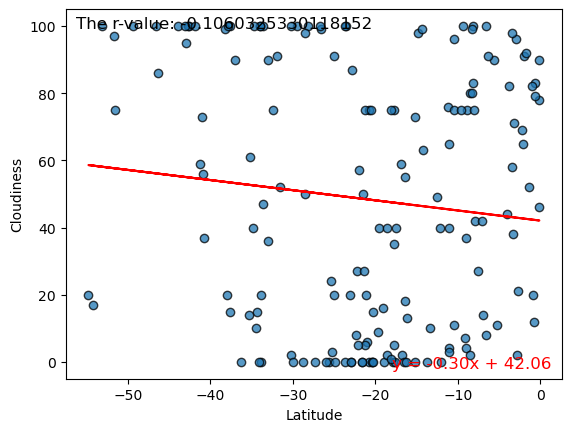

In [132]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Cloudiness"]
x_label_southern = "Latitude"
y_label_southern = "Cloudiness"
save_file_southern = "output_data/Fig10.png"

create_linear_regression_plot(x_values_southern, y_values_southern, x_label_southern, y_label_southern, save_file_southern)

**Discussion about the linear relationship:** 
1. For the northern hemisphere:
The r-value is very close to 0 (-0.002), indicating a very weak or no correlation between cloudiness and latitude in the northern hemisphere. The data points are scattered and do not show a clear linear trend.The slope is close to zero, indicating almost no change in cloudiness with changes in latitude.
2. For the southern hemisphere:
The r-value is -0.11, indicating a weak negative correlation between cloudiness and latitude in the southern hemisphere. The relationship is weak, and the data points do not follow a clear linear trend. The slope is close to zero, indicating almost no change in cloudiness with changes in latitude.

Overall, both the northern and southern hemispheres show very weak or no significant linear relationship between cloudiness and latitude.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.09769077727720192


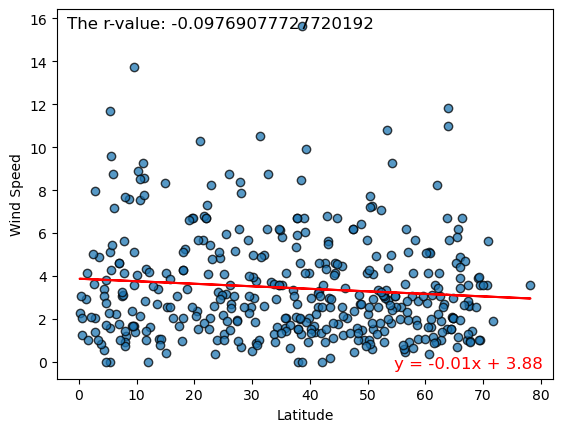

In [133]:
# Northern Hemisphere
x_values_northern = northern_hemi_df["Lat"]
y_values_northern = northern_hemi_df["Wind Speed"]
x_label_northern = "Latitude"
y_label_northern = "Wind Speed"
save_file_northern = "output_data/Fig11.png"

create_linear_regression_plot(x_values_northern, y_values_northern, x_label_northern, y_label_northern, save_file_northern)

The r-value is: -0.12276910646478965


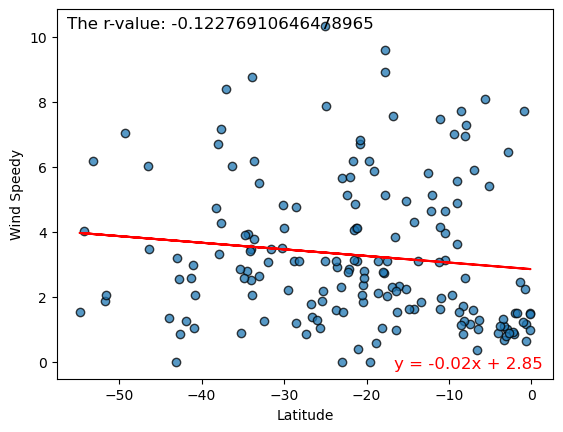

In [134]:
# Southern Hemisphere
x_values_southern = southern_hemi_df["Lat"]
y_values_southern = southern_hemi_df["Wind Speed"]
x_label_southern = "Latitude"
y_label_southern = "Wind Speedy"
save_file_southern = "output_data/Fig12.png"


create_linear_regression_plot(x_values_southern, y_values_southern, x_label_southern, y_label_southern, save_file_southern)

**Discussion about the linear relationship:** 
1. For the northern hemisphere:
The r-value is -0.098, indicating a very weak negative correlation between latitude and wind speed in the northern hemisphere. The relationship between these variables is very weak, and the data points are scattered with no clear linear trend. The slope is very small (-0.01), indicating a minimal change in wind speed with latitude.
2. For the southern hemisphere:
The r-value is -0.123, indicating a very weak negative correlation between latitude and wind speed in the southern hemisphere. The relationship is very weak, and the data points are scattered with no clear linear trend. The slope is very small (-0.02), indicating a minimal change in wind speed with latitude.

Overall, both the northern and southern hemispheres show a very weak negative correlation between latitude and wind speed. The influence of latitude on wind speed appears to be minimal.